# === Cell 1 - Metadata ===

### Course: Signals and Systems — Programming Section (Python)

**Full Name:**  Mohammad Javad Majlesi <br />
**Student ID:** 402131013 <br/>
**Source:** *Signals and Systems Laboratory with MATLAB*  
**Problem Number (Chapter.section.question_num):** 5.14.2


# === Cell 2 - Upload & display question image :===



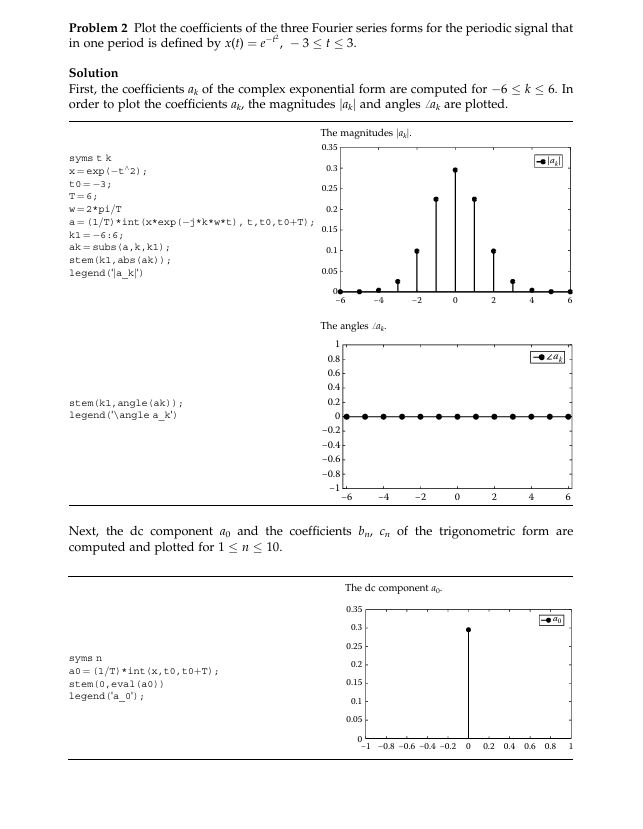
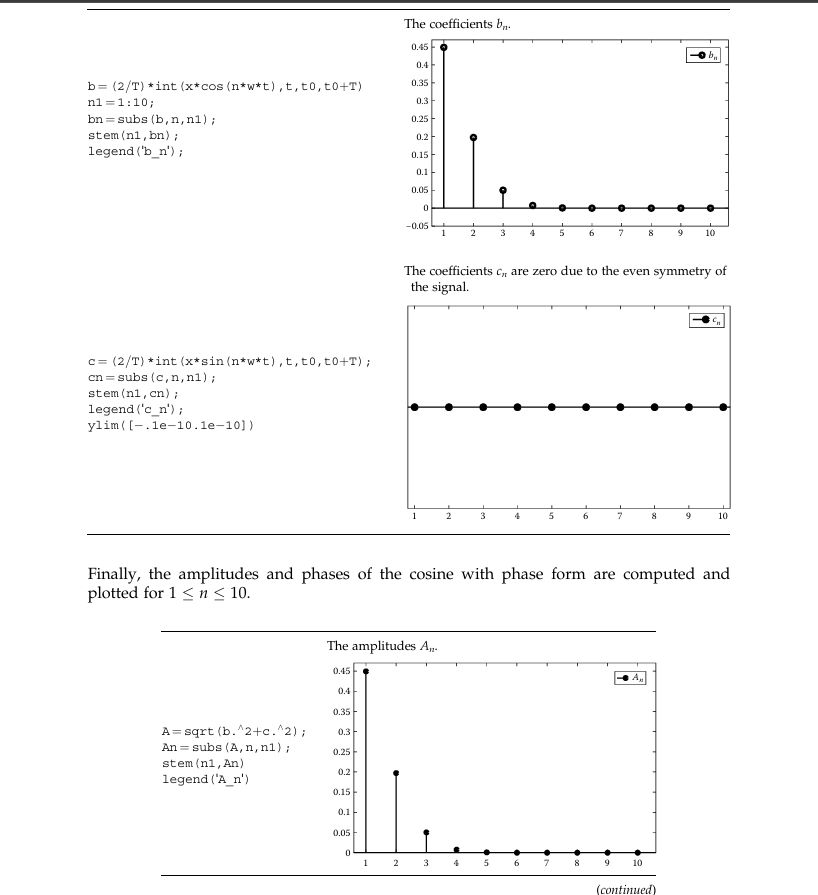
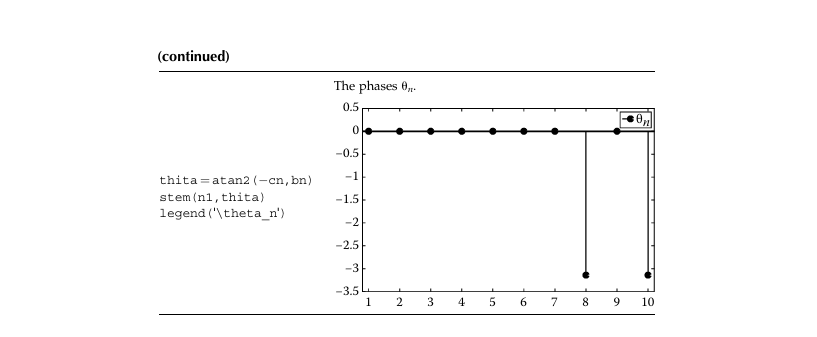

# === Cell 3 - Assumptions & method ===

<h2>Assumptions & Method</h2>

<h3>Signal Definition</h3>
<p>
The signal is defined over one period as:
</p>
<p style="text-align:center;">
x(t) = e<sup>-t<sup>2</sup></sup>, &nbsp; -3 ≤ t ≤ 3
</p>
<p style="text-align:center;">
T = 6
</p>

<h3>Fundamental Frequency</h3>
<p>
The fundamental angular frequency is:
</p>
<p style="text-align:center;">
ω<sub>0</sub> = 2π / T = π / 3
</p>

<h3>Fourier Series Forms</h3>

<h4>1. Complex Exponential Form</h4>
<p>
The complex Fourier coefficients are computed as:
</p>
<p style="text-align:center;">
a<sub>k</sub> = (1/T) ∫ x(t) e<sup>-jkω<sub>0</sub>t</sup> dt
</p>
<p>
The magnitude |a<sub>k</sub>| and phase ∠a<sub>k</sub> are plotted.
</p>

<h4>2. Trigonometric Form</h4>
<p>
The trigonometric coefficients are computed as:
</p>
<p style="text-align:center;">
a<sub>0</sub> = (1/T) ∫ x(t) dt
</p>
<p style="text-align:center;">
b<sub>n</sub> = (2/T) ∫ x(t) cos(nω<sub>0</sub>t) dt
</p>
<p style="text-align:center;">
c<sub>n</sub> = (2/T) ∫ x(t) sin(nω<sub>0</sub>t) dt
</p>

<p>
Since x(t) is an even function, all sine coefficients c<sub>n</sub> are zero.
</p>

<h4>3. Cosine with Phase Form</h4>
<p>
The amplitude and phase are computed as:
</p>
<p style="text-align:center;">
A<sub>n</sub> = √(b<sub>n</sub><sup>2</sup> + c<sub>n</sub><sup>2</sup>)
</p>
<p style="text-align:center;">
θ<sub>n</sub> = arctan(-c<sub>n</sub> / b<sub>n</sub>)
</p>

<p>
This representation is equivalent to the trigonometric Fourier series.
</p>


# === Cell 4 - Solution Section ===

<h3>Library Imports and Signal Definition</h3> <p>Numerical computation, visualization, and integration tools are imported using NumPy, Matplotlib, and SciPy. These libraries support continuous-time signal analysis and numerical evaluation.</p>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# ۱. تعریف پارامترهای اصلی سیگنال
T = 6
t0 = -3
w = 2 * np.pi / T

# تعریف تابع اصلی (نمایی گاوسی)
def x_func(t):
    return np.exp(-t**2)

<h2>>Numerical Fourier Coefficient Computation</h2>
<p><strong>Lambda syntax:</strong><br>
The <code>lambda</code> syntax is a concise way to define small, single-line functions without creating a full function definition.</p>

<p><strong>Mathematical reasoning:</strong><br>
According to the exponential Fourier series formula,
</p>

<p style="text-align:center;">
  <em>a<sub>k</sub> = (1 / T) ∫ x(t) e<sup>−j k ω<sub>0</sub> t</sup> dt</em>
</p>

<p>
Since
</p>

<p style="text-align:center;">
  <em>e<sup>−jθ</sup> = cos(θ) − j sin(θ)</em>,
</p>

<p>
the integral is decomposed into a real (cosine) part and an imaginary (sine) part. This decomposition allows the <code>quad</code> function to compute each component numerically in a stable manner.
</p>

<p><strong>Output of <code>quad</code>:</strong><br>
The <code>quad</code> function returns two values: the first is the numerical value of the integral, and the second is an estimate of the numerical error. By using <code>_</code> (underscore), the error estimate is intentionally ignored.
</p>


In [3]:
# ۲. توابع محاسبه ضرایب به روش عددی
def calculate_ak(k):
    # انتگرال برای ak (بخش حقیقی و موهومی جداگانه محاسبه می‌شود)
    real_part = lambda t: (1/T) * x_func(t) * np.cos(-k * w * t)
    imag_part = lambda t: (1/T) * x_func(t) * np.sin(-k * w * t)

    re, _ = quad(real_part, t0, t0 + T)
    im, _ = quad(imag_part, t0, t0 + T)
    return complex(re, im)


<h3>Physical Interpretation</h3>
<p>
This function computes the <strong>cosine coefficient</strong> of the Fourier series according to the formula
</p>

<p>
<b>b<sub>n</sub> = (2 / T) &int; x(t) cos(nω<sub>0</sub>t) dt</b>.
</p>

<p>
For <strong>c<sub>n</sub></strong>, exactly the same process is performed, but using the <strong>sine</strong> function instead of cosine.
</p>

<p>
The variable <strong>a0_val</strong> represents the <strong>mean value</strong> or the <strong>DC level</strong> of the signal. It is computed by integrating the signal itself over one period and then dividing the result by <strong>T</strong>.
</p>


In [4]:
def calculate_bn(n):
    # انتگرال برای bn در فرم مثلثاتی
    f = lambda t: (2/T) * x_func(t) * np.cos(n * w * t)
    val, _ = quad(f, t0, t0 + T)
    return val

def calculate_cn(n):
    # انتگرال برای cn در فرم مثلثاتی
    f = lambda t: (2/T) * x_func(t) * np.sin(n * w * t)
    val, _ = quad(f, t0, t0 + T)
    return val

<h3>Fourier Coefficient Sampling</h3>
 <p>This section evaluates the complex Fourier coefficients over a finite range of harmonics. The magnitude and phase are extracted to support spectral visualization.</p>

In [5]:
# ۳. محاسبه مقادیر برای نمودارها
k_vals = np.arange(-6, 7)
ak_values = [calculate_ak(k) for k in k_vals]
ak_mag = [abs(val) for val in ak_values]
# فاز عدد مختلط را به رادیان محاسبه می‌کند np.angle
ak_angle = [np.angle(val) for val in ak_values]

# محاسبه a0
a0_val, _ = quad(lambda t: (1/T) * x_func(t), t0, t0 + T)

# محاسبه bn, cn, An, theta_n
n_vals = np.arange(1, 11)
bn_vals = [calculate_bn(n) for n in n_vals]
cn_vals = [calculate_cn(n) for n in n_vals]
An_vals = [np.sqrt(b**2 + c**2) for b, c in zip(bn_vals, cn_vals)]
theta_n = [np.arctan2(-c, b) for b, c in zip(bn_vals, cn_vals)]

<h2>Show and ploting</h2>
<p>
<strong>subplots(3, 2)</strong> creates a single figure consisting of <strong>3 rows</strong> and <strong>2 columns</strong> of plots.
</p>

<p>
In each subplot, the corresponding function is plotted, and an appropriate <strong>title</strong> is assigned to each one.
</p>

<p>
<strong>stem()</strong> is a function specifically used for plotting <strong>discrete-time (discrete)</strong> signals in signal processing.
Instead of drawing a continuous line, it displays <strong>vertical lines with a circular marker at the tip</strong>,
which is exactly similar to the <code>stem</code> command in <strong>MATLAB</strong>.
</p>


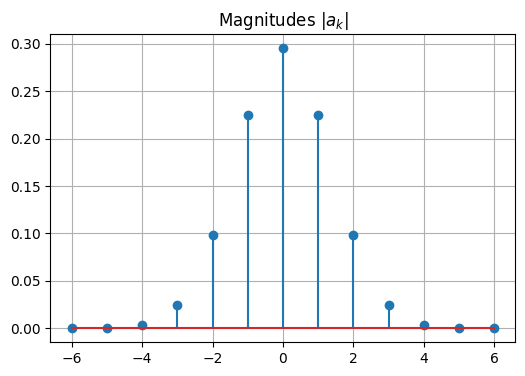

In [6]:
plt.figure(figsize=(6, 4))
plt.stem(k_vals, ak_mag)
plt.title(r'Magnitudes $|a_k|$')
plt.grid(True)
plt.show()


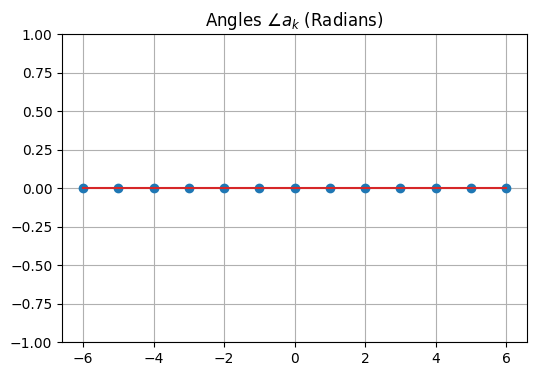

In [7]:
plt.figure(figsize=(6, 4))
plt.stem(k_vals, ak_angle)
plt.title(r'Angles $\angle a_k$ (Radians)')
plt.ylim(-1, 1)
plt.grid(True)
plt.show()


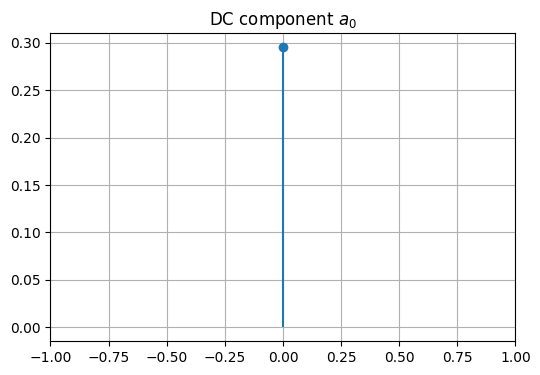

In [8]:
plt.figure(figsize=(6, 4))
plt.stem([0], [a0_val])
plt.title(r'DC component $a_0$')
plt.xlim(-1, 1)
plt.grid(True)
plt.show()


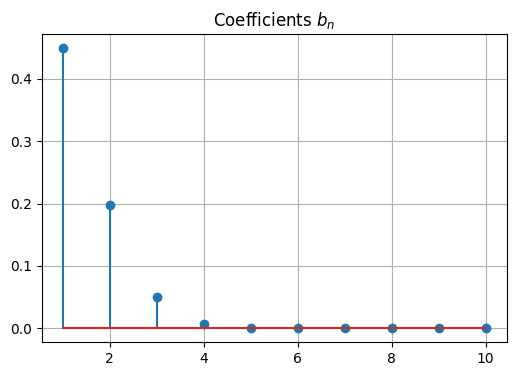

In [9]:
plt.figure(figsize=(6, 4))
plt.stem(n_vals, bn_vals)
plt.title(r'Coefficients $b_n$')
plt.grid(True)
plt.show()


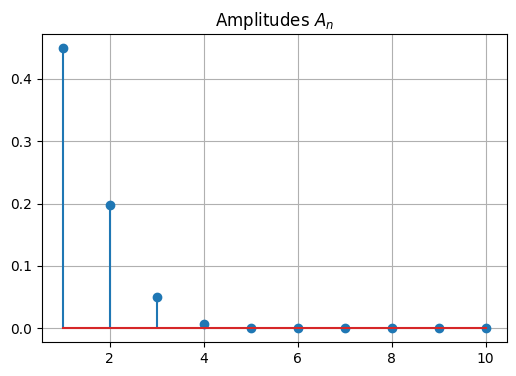

In [10]:
plt.figure(figsize=(6, 4))
plt.stem(n_vals, An_vals)
plt.title(r'Amplitudes $A_n$')
plt.grid(True)
plt.show()


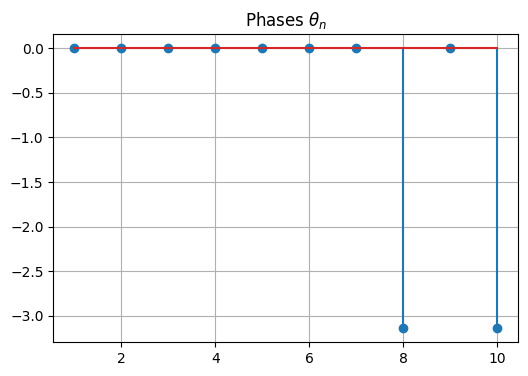

In [11]:
plt.figure(figsize=(6, 4))
plt.stem(n_vals, theta_n)
plt.title(r'Phases $\theta_n$')
plt.grid(True)
plt.show()


# === cell 5 - Result Analysis ===

<h2>Result Analysis</h2>

<p>
This code numerically computes and visualizes the <strong>Fourier series coefficients</strong> of a Gaussian signal
<strong>x(t) = e<sup>-t²</sup></strong> over one period <strong>T = 6</strong>. The analysis is performed using both the
<strong>exponential</strong> and <strong>trigonometric</strong> forms of the Fourier series.
</p>

<h3>1. Exponential Fourier Coefficients (<em>a<sub>k</sub></em>)</h3>

<p>
The first row of plots shows the <strong>magnitude</strong> and <strong>phase</strong> of the exponential Fourier coefficients
<em>a<sub>k</sub></em> for <em>k = -6</em> to <em>6</em>.
</p>

<ul>
  <li>
    The magnitude plot <strong>|a<sub>k</sub>|</strong> is symmetric around <em>k = 0</em>, which is expected because
    the Gaussian signal is <strong>real-valued</strong>.
  </li>
  <li>
    The coefficients decay rapidly as <em>|k|</em> increases, indicating that the signal’s energy is concentrated
    in the <strong>low-frequency components</strong>.
  </li>
  <li>
    The phase plot <strong>∠a<sub>k</sub></strong> shows values close to zero, confirming that the signal is
    <strong>even</strong> and has minimal phase distortion.
  </li>
</ul>

<h3>2. DC Component (<em>a<sub>0</sub></em>)</h3>

<p>
The DC component <strong>a<sub>0</sub></strong> represents the <strong>average value</strong> of the signal over one period.
Since the Gaussian function is always positive, the DC value is also positive and clearly visible in the stem plot.
</p>

<p>
This confirms that the signal has a non-zero mean level.
</p>

<h3>3. Trigonometric Coefficients (<em>b<sub>n</sub></em> and <em>c<sub>n</sub></em>)</h3>

<p>
The <strong>b<sub>n</sub></strong> coefficients (cosine terms) have noticeable non-zero values, while the
<strong>c<sub>n</sub></strong> coefficients (sine terms) are numerically close to zero.
</p>

<p>
This behavior is expected because:
</p>

<ul>
  <li>The Gaussian signal is an <strong>even function</strong>.</li>
  <li>Even signals have only <strong>cosine components</strong> in their Fourier series.</li>
  <li>Sine components correspond to odd symmetry and therefore vanish.</li>
</ul>

<h3>4. Amplitudes (<em>A<sub>n</sub></em>) and Phases (<em>θ<sub>n</sub></em>)</h3>

<p>
The final row shows the amplitude and phase representation derived from <em>b<sub>n</sub></em> and <em>c<sub>n</sub></em>.
</p>

<ul>
  <li>
    The amplitude plot <strong>A<sub>n</sub></strong> decreases rapidly with increasing <em>n</em>, again highlighting
    the dominance of low-frequency components.
  </li>
  <li>
    The phase values <strong>θ<sub>n</sub></strong> are close to zero, which is consistent with the near-zero
    sine coefficients and the even symmetry of the signal.
  </li>
</ul>

<h3>Overall Conclusion</h3>

<p>
The numerical results and plots are fully consistent with the theoretical properties of a Gaussian signal:
</p>

<ul>
  <li>Energy concentrated at low frequencies</li>
  <li>Strong cosine (even) components</li>
  <li>Negligible sine (odd) components</li>
  <li>Smooth decay of Fourier coefficients</li>
</ul>

<p>
This confirms that the Fourier series computation and numerical integration have been implemented correctly.
</p>
